## Camera calibration using chessboard images

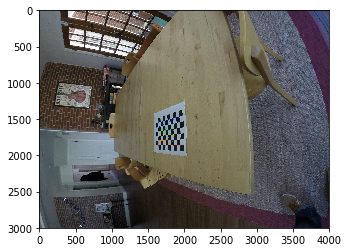

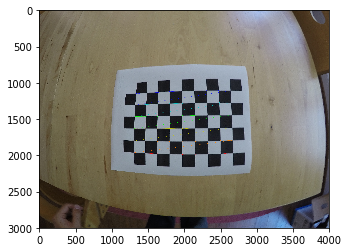

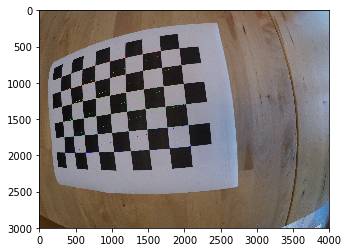

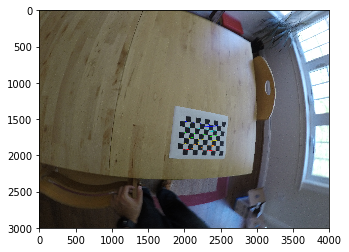

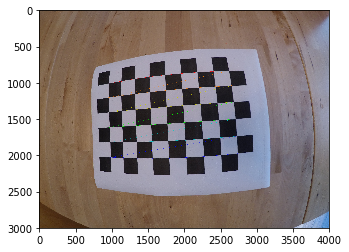

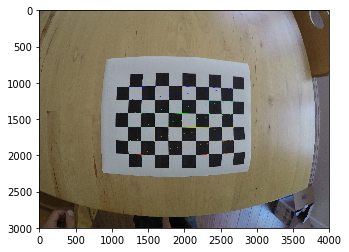

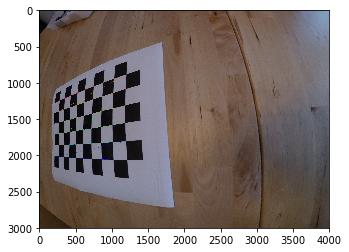

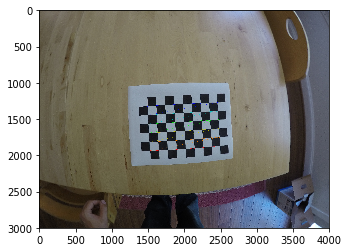

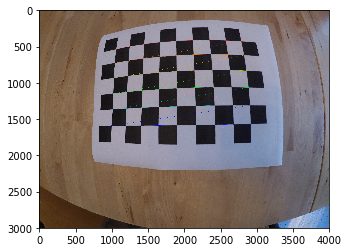

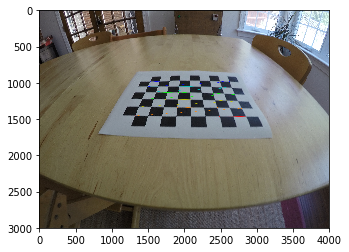

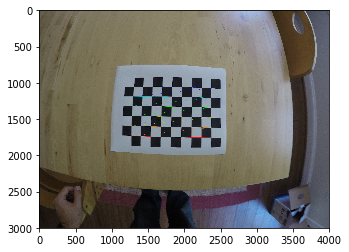

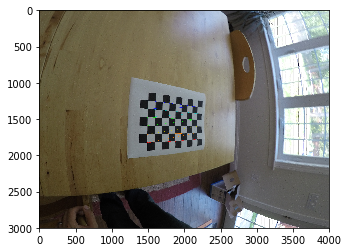

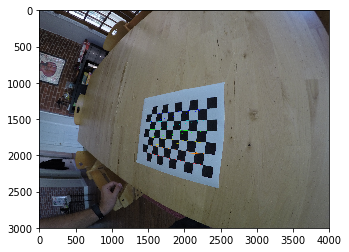

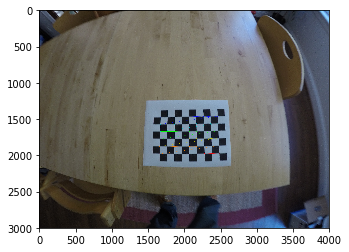

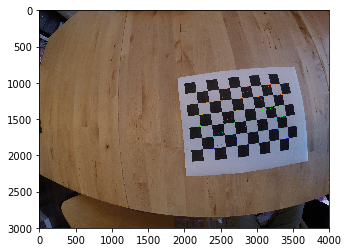

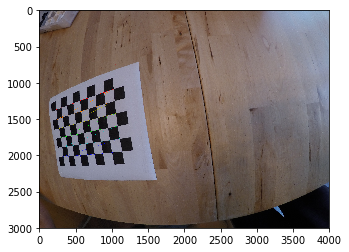

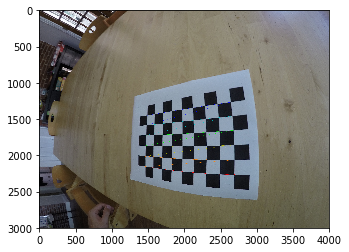

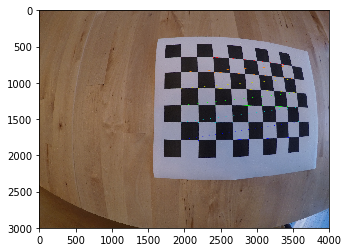

In [5]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../gopro_test/GOPR*.JPG')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)

    # Grayscale the image
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        img = img[...,::-1]  # RGB -> BGR
        plt.figure()
        plt.imshow(img)
        
# Camera calibration, given object points, image points, and the shape of the grayscale image
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

Undistorting a test image


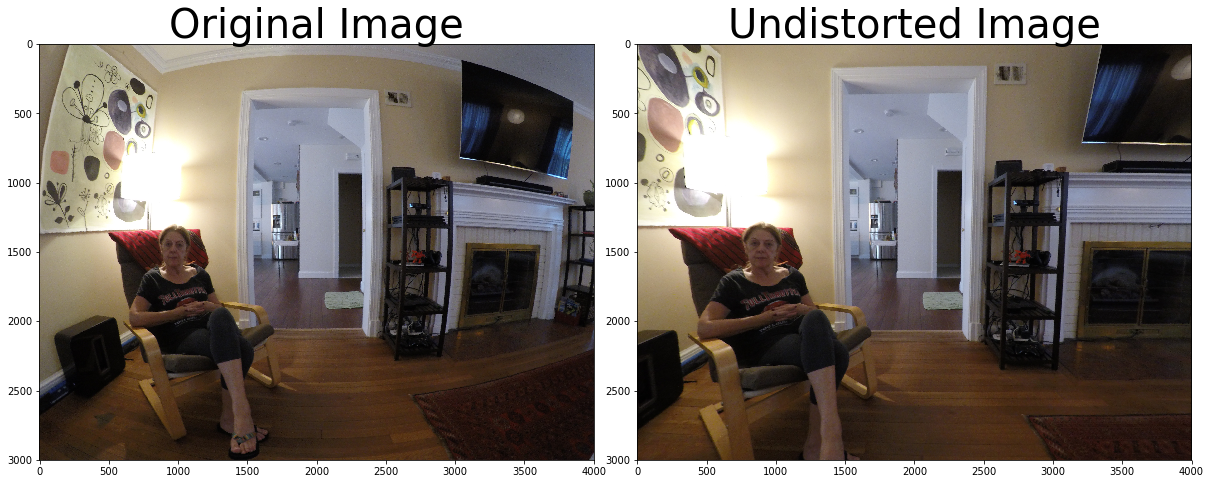

In [6]:
# Undistorting a test image
print('Undistorting a test image')

image = cv2.imread('../gopro_test/original.jpg')
image = image[...,::-1]  # RGB -> BGR
dst = cv2.undistort(image, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(dst, cmap='gray')
ax2.set_title('Undistorted Image', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
dst = dst[...,::-1]  # RGB -> BGR
cv2.imwrite( "../gopro_test/final.jpg", dst);